<a href="https://colab.research.google.com/github/WilliamShengYangHuang/AALU_Coding/blob/main/Intro_to_Pandas_22_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Data Analysis Using Pandas**
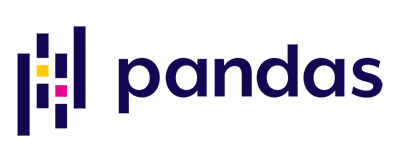

Course Tutor: William Huang (huang.sheng-ynag@aaschool.ac.uk)

for Landscape Urbanism, AA School

Last Modified in January 2023

California Housing Data form Google LLC (2017)

[*Pandas*](http://pandas.pydata.org/) is a column-oriented data analysis API. It's a great tool for handling and analysing input data, and many machine learning frameworks support *pandas* data structures as inputs.

In [1]:
#@title
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

**Learning Objectives:**
  * Gain an introduction to the `DataFrame` and `Series` data structures of the *pandas* package
  * Access and manipulate data within a `DataFrame` and `Series`
  * Import CSV data into a *pandas* `DataFrame`
  * Visualise a `DataFrame` at a basic level

### Basics

In [2]:
import numpy as np
import pandas as pd
pd.__version__ # Displays Pandas version

'1.5.3'

The primary data structures in *pandas* are implemented as two classes:

  * **`DataFrame`**, which you can imagine as a relational data table, with rows and named columns.
  * **`Series`**, which is a single column. A `DataFrame` contains one or more `Series` and a name for each `Series`.

### Create Series

One way to create a `Series` is to construct a `Series` object. For example:

In [3]:
pd.Series(['Oxford', 'Cambridge', 'London'])

0       Oxford
1    Cambridge
2       London
dtype: object

`DataFrame` objects can be created by passing a `dict` mapping `string` column names to their respective `Series`. If the `Series` don't match in length, missing values are filled with special [NA/NaN](http://pandas.pydata.org/pandas-docs/stable/missing_data.html) values. Example:

In [4]:
city_names = pd.Series(['Oxford', 'Cambridge', 'London'])
population = pd.Series([152450, 678600, 8982000])

pd.DataFrame({ 'City name': city_names, 'Population': population })

,City name,Population
0,Oxford,152450
1,Cambridge,678600
2,London,8982000


## Mini-project on Fabricated Data

In [5]:
test_df = pd.DataFrame()
size = 10000

# Create random data
test_df['area(m2)'] = np.random.randint(80, 150, size)
test_df['price per m2'] = np.random.randint(10000, 100000, size)
test_df['borough'] = np.random.choice(['Bloomsbury', 'Westminster', 'Camden', 'Barnet', 'Greenwich'], size)

In [6]:
# Check current data frame
test_df

,area(m2),price per m2,borough
0,124,91200,Barnet
1,137,57258,Greenwich
2,93,62449,Bloomsbury
3,144,67348,Greenwich
4,101,59171,Westminster
...,...,...,...
9995,86,85741,Bloomsbury
9996,102,74339,Camden
9997,90,30708,Bloomsbury
9998,103,74623,Westminster


In [7]:
# Calculate price for the ntire property
test_df['price'] = test_df['area(m2)'] * test_df['price per m2']

In [8]:
# Check current data frame
test_df

,area(m2),price per m2,borough,price
0,124,91200,Barnet,11308800
1,137,57258,Greenwich,7844346
2,93,62449,Bloomsbury,5807757
3,144,67348,Greenwich,9698112
4,101,59171,Westminster,5976271
...,...,...,...,...
9995,86,85741,Bloomsbury,7373726
9996,102,74339,Camden,7582578
9997,90,30708,Bloomsbury,2763720
9998,103,74623,Westminster,7686169


In [9]:
# Reorder columns
# (This only benefit humans)
test_df = test_df[['borough', 'area(m2)', 'price per m2', 'price']]

In [10]:
test_df

,borough,area(m2),price per m2,price
0,Barnet,124,91200,11308800
1,Greenwich,137,57258,7844346
2,Bloomsbury,93,62449,5807757
3,Greenwich,144,67348,9698112
4,Westminster,101,59171,5976271
...,...,...,...,...
9995,Bloomsbury,86,85741,7373726
9996,Camden,102,74339,7582578
9997,Bloomsbury,90,30708,2763720
9998,Westminster,103,74623,7686169


In [11]:
# Select rows based on one condition
# Select Greenwich data
grw_df = test_df[test_df['borough'] == 'Greenwich']
grw_df

,borough,area(m2),price per m2,price
1,Greenwich,137,57258,7844346
3,Greenwich,144,67348,9698112
7,Greenwich,145,12619,1829755
9,Greenwich,136,16192,2202112
10,Greenwich,118,30404,3587672
...,...,...,...,...
9980,Greenwich,149,47015,7005235
9984,Greenwich,123,25155,3094065
9988,Greenwich,111,20613,2288043
9991,Greenwich,135,69515,9384525


#### Pandas multi-conditional statements:

`new_df = df[(con1) & (con2)]`

Use `&` for 'and'

Use `|` for 'or'

Use `~` for 'not'




In [12]:
# Select rows based on mutiple conditions
grw_df = test_df[(test_df['borough'] == 'Greenwich') & (test_df['price per m2'] < 50000)]
grw_df

,borough,area(m2),price per m2,price
7,Greenwich,145,12619,1829755
9,Greenwich,136,16192,2202112
10,Greenwich,118,30404,3587672
11,Greenwich,119,12847,1528793
12,Greenwich,82,46308,3797256
...,...,...,...,...
9966,Greenwich,112,45857,5135984
9980,Greenwich,149,47015,7005235
9984,Greenwich,123,25155,3094065
9988,Greenwich,111,20613,2288043


In [13]:
# Sorting rows by price per square meter
grw_df.sort_values(by='price per m2', ascending=False)

,borough,area(m2),price per m2,price
933,Greenwich,119,49960,5945240
7648,Greenwich,112,49955,5594960
1930,Greenwich,95,49901,4740595
2963,Greenwich,117,49814,5828238
4811,Greenwich,141,49813,7023633
...,...,...,...,...
7516,Greenwich,92,10361,953212
7480,Greenwich,144,10328,1487232
6770,Greenwich,94,10229,961526
7944,Greenwich,135,10058,1357830


# Use Loaded Data - California Housing Dataset

But most of the time, you load an entire file into a `DataFrame`. The following example loads a file with California housing data. Run the following cell to load the data and create feature definitions:



## Load Datasheet

Option 1: Load CSV from Google Drive

In [14]:
import os
from google.colab import drive

# Place the dataset in your Google Drive
drive.mount("/content/drive")

Mounted at /content/drive


In [15]:
# Set csv file path
PATH = "/content/drive/My Drive/california_housing_train.csv"

# Read csv from Drive
import pandas as pd
df = pd.read_csv(PATH)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15,5612,1283,1015,472,1.4936,66900
1,-114.47,34.40,19,7650,1901,1129,463,1.8200,80100
2,-114.56,33.69,17,720,174,333,117,1.6509,85700
3,-114.57,33.64,14,1501,337,515,226,3.1917,73400
4,-114.57,33.57,20,1454,326,624,262,1.9250,65500
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52,2217,394,907,369,2.3571,111400
16996,-124.27,40.69,36,2349,528,1194,465,2.5179,79000
16997,-124.30,41.84,17,2677,531,1244,456,3.0313,103600
16998,-124.30,41.80,19,2672,552,1298,478,1.9797,85800


Option 2: Load CSV from local file path

In [16]:
# Read csv from a local file path
from google.colab import files
uploaded = files.upload()

Saving california_housing_train.csv to california_housing_train.csv


In [17]:
# Read data
df2 = pd.read_csv('california_housing_train.csv')
df2

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15,5612,1283,1015,472,1.4936,66900
1,-114.47,34.40,19,7650,1901,1129,463,1.8200,80100
2,-114.56,33.69,17,720,174,333,117,1.6509,85700
3,-114.57,33.64,14,1501,337,515,226,3.1917,73400
4,-114.57,33.57,20,1454,326,624,262,1.9250,65500
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52,2217,394,907,369,2.3571,111400
16996,-124.27,40.69,36,2349,528,1194,465,2.5179,79000
16997,-124.30,41.84,17,2677,531,1244,456,3.0313,103600
16998,-124.30,41.80,19,2672,552,1298,478,1.9797,85800


In [18]:
df2.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [19]:
# Access one specific column
df2['total_rooms']

0        5612
1        7650
2         720
3        1501
4        1454
         ... 
16995    2217
16996    2349
16997    2677
16998    2672
16999    1820
Name: total_rooms, Length: 17000, dtype: int64

In [20]:
df2['total_rooms'] > 1000

0         True
1         True
2        False
3         True
4         True
         ...  
16995     True
16996     True
16997     True
16998     True
16999     True
Name: total_rooms, Length: 17000, dtype: bool

In [21]:
df2['big_house'] = df2['total_rooms'] > 1000

# Updated dataframe
df2

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,big_house
0,-114.31,34.19,15,5612,1283,1015,472,1.4936,66900,True
1,-114.47,34.40,19,7650,1901,1129,463,1.8200,80100,True
2,-114.56,33.69,17,720,174,333,117,1.6509,85700,False
3,-114.57,33.64,14,1501,337,515,226,3.1917,73400,True
4,-114.57,33.57,20,1454,326,624,262,1.9250,65500,True
...,...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52,2217,394,907,369,2.3571,111400,True
16996,-124.27,40.69,36,2349,528,1194,465,2.5179,79000,True
16997,-124.30,41.84,17,2677,531,1244,456,3.0313,103600,True
16998,-124.30,41.80,19,2672,552,1298,478,1.9797,85800,True


The example above used `DataFrame.describe` to show interesting statistics about a `DataFrame`. Another useful function is `DataFrame.head`, which displays the first few records of a `DataFrame`:

In [22]:
df2.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,big_house
0,-114.31,34.19,15,5612,1283,1015,472,1.4936,66900,True
1,-114.47,34.40,19,7650,1901,1129,463,1.8200,80100,True
2,-114.56,33.69,17,720,174,333,117,1.6509,85700,False
3,-114.57,33.64,14,1501,337,515,226,3.1917,73400,True
4,-114.57,33.57,20,1454,326,624,262,1.9250,65500,True


Another powerful feature of *pandas* is graphing. For example, `DataFrame.hist` lets you quickly study the distribution of values in a column:

### Analyse Data (Basics)

#### Mean:

\
$$\mu = \frac{\sum_{i=1}^{n}x_i}{n}$$

In [23]:
# Calculate the mean of a column
mean_m_age = df2['housing_median_age'].mean()
print(mean_m_age)

28.58935294117647



#### Variance:

Variance is a statistical measure that tells us how much the individual data points in a data set deviate from the mean of the data set. In other words, it measures how spread out the data is around the average. A low variance indicates that the data points are clustered closely around the mean, while a high variance indicates that the data points are more spread out. The variance is calculated by taking the average of the squared differences between each data point and the mean. It is often used in conjunction with other statistical measures such as the mean and standard deviation to gain a deeper understanding of a data set.

Definition:

\
$$s^2 = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2$$




The square root of the variance is the standard deviation.

#### Standard Deviation:

\
$$\sigma = \sqrt{\frac{1}{N}\sum_{i=1}^{N}(x_i - \overline{x})^2}$$

In [24]:
# Calculate the variance of a column
variance_m_age = df2['housing_median_age'].var()
print(variance_m_age)

158.4309825802902


#### Covariance:

Covariance is a statistical measure that describes how two random variables in a dataset move in relation to each other. It measures the extent to which the values of one variable change when the values of another variable change.

Covariance can take any value, with larger values indicating stronger relationships between the variables. However, the magnitude of the covariance alone does not give a complete picture of the relationship between the variables. It is often normalised to give the correlation coefficient, which ranges from -1 to +1, and provides a better measure of the strength and direction of the relationship between two variables.

A positive covariance indicates that the two variables tend to move in the same direction. For example, if we consider a dataset of students' exam scores in two subjects, then a positive covariance between the scores of the two subjects would mean that if a student performs well in one subject, then he/she is more likely to perform well in the other subject as well. On the other hand, a negative covariance indicates that the two variables tend to move in opposite directions. For example, if we consider a dataset of the flat price and the number of falts sold, then a negative covariance would indicate that as the temperature rises, the number of flats sold decreases.

Definitions:

\
$$\operatorname{Cov}(X,Y) = E[(X - E[X])(Y - E[Y])]$$

or

\
$$\operatorname{Cov}(X,Y) = r \sigma_X \sigma_Y$$

Try interpret the results below:

In [25]:
covariance = df['housing_median_age'].cov(df['median_house_value'])
print(covariance)

155853.476977227


In [26]:
covariance = df['housing_median_age'].cov(df['latitude'])
print(covariance)

0.44265213670008136


In [27]:
covariance = df['housing_median_age'].cov(df['longitude'])
print(covariance)

-2.8835524201769682


In [28]:
covariance = df['housing_median_age'].cov(df['median_income'])
print(covariance)

-2.784427888928761


#### Distance between Data Value and the Mean:

In [29]:
# calculate the distance of each value from the mean
distances = [abs(x - mean_m_age) for x in df['housing_median_age']]

# print the mean and distances
print(mean_m_age)
print(distances)

28.58935294117647
[13.589352941176472, 9.589352941176472, 11.589352941176472, 14.589352941176472, 8.589352941176472, 0.41064705882352825, 3.5893529411764717, 12.410647058823528, 5.410647058823528, 17.41064705882353, 12.589352941176472, 7.589352941176472, 19.41064705882353, 2.4106470588235283, 13.589352941176472, 11.589352941176472, 0.5893529411764717, 7.589352941176472, 11.589352941176472, 11.589352941176472, 8.589352941176472, 4.589352941176472, 8.589352941176472, 13.589352941176472, 10.589352941176472, 5.410647058823528, 1.4106470588235283, 14.589352941176472, 3.4106470588235283, 5.589352941176472, 9.410647058823528, 6.410647058823528, 12.589352941176472, 9.589352941176472, 9.589352941176472, 0.41064705882352825, 4.410647058823528, 7.589352941176472, 13.589352941176472, 9.589352941176472, 11.589352941176472, 0.41064705882352825, 3.5893529411764717, 15.589352941176472, 10.589352941176472, 6.410647058823528, 3.4106470588235283, 7.589352941176472, 8.589352941176472, 17.58935294117647, 1

## Analytical Visualisation

In [30]:
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'housing_median_age'}>]], dtype=object)

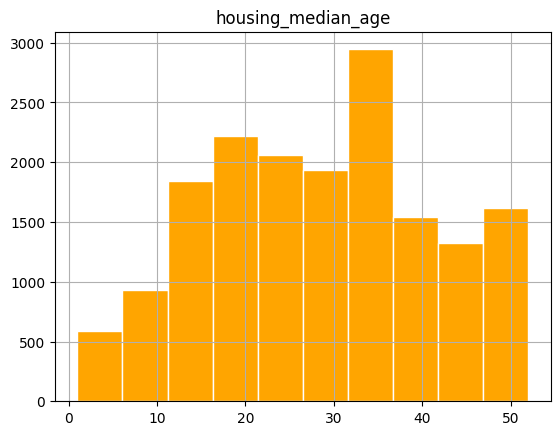

In [31]:
df2.hist('housing_median_age', color='orange', alpha=1, edgecolor='white')

In [32]:
count = df2['big_house'].value_counts(normalize=True) # Note: find the function to count data at a specific value
print(type(count))
count_list = list(count)
print(count_list)

<class 'pandas.core.series.Series'>
[0.889, 0.111]


([<matplotlib.patches.Wedge at 0x7c90094068f0>,
 [Text(-1.033793144505799, 0.37586132332658534, 'True: 0.889'),
  Text(1.033793144505799, -0.3758613233265859, 'False: 0.111')])

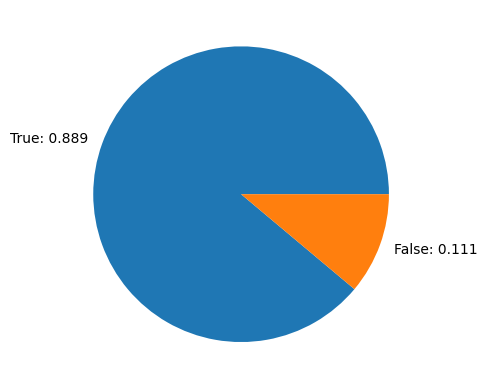

In [33]:
LABELS = ['True' + ': ' + str(count_list[0]), 'False'+ ': ' + str(count_list[1])]
plt.pie(count_list, labels=LABELS)

Subplot

([<matplotlib.patches.Wedge at 0x7c90094a3190>,
 [Text(-1.033793144505799, 0.37586132332658534, 'True: 0.889'),
  Text(1.033793144505799, -0.3758613233265859, 'False: 0.111')])

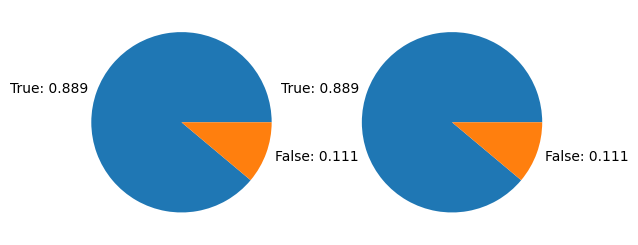

In [34]:
plt.subplot(1, 2, 1)
LABELS = ['True' + ': ' + str(count_list[0]), 'False'+ ': ' + str(count_list[1])]
plt.pie(count_list, labels=LABELS)

plt.subplot(1, 2, 2)
LABELS = ['True' + ': ' + str(count_list[0]), 'False'+ ': ' + str(count_list[1])]
plt.pie(count_list, labels=LABELS)

([<matplotlib.patches.Wedge at 0x7c9009332e00>,
 [Text(-1.033793144505799, 0.37586132332658534, 'True: 0.889'),
  Text(1.033793144505799, -0.3758613233265859, 'False: 0.111')])

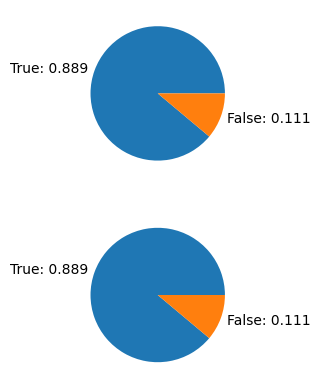

In [35]:
plt.subplot(2, 1, 1)
LABELS = ['True' + ': ' + str(count_list[0]), 'False'+ ': ' + str(count_list[1])]
plt.pie(count_list, labels=LABELS)

plt.subplot(2, 1, 2)
LABELS = ['True' + ': ' + str(count_list[0]), 'False'+ ': ' + str(count_list[1])]
plt.pie(count_list, labels=LABELS)

([<matplotlib.patches.Wedge at 0x7c90093c6aa0>,
 [Text(-1.033793144505799, 0.37586132332658534, 'True: 0.889'),
  Text(1.033793144505799, -0.3758613233265859, 'False: 0.111')])

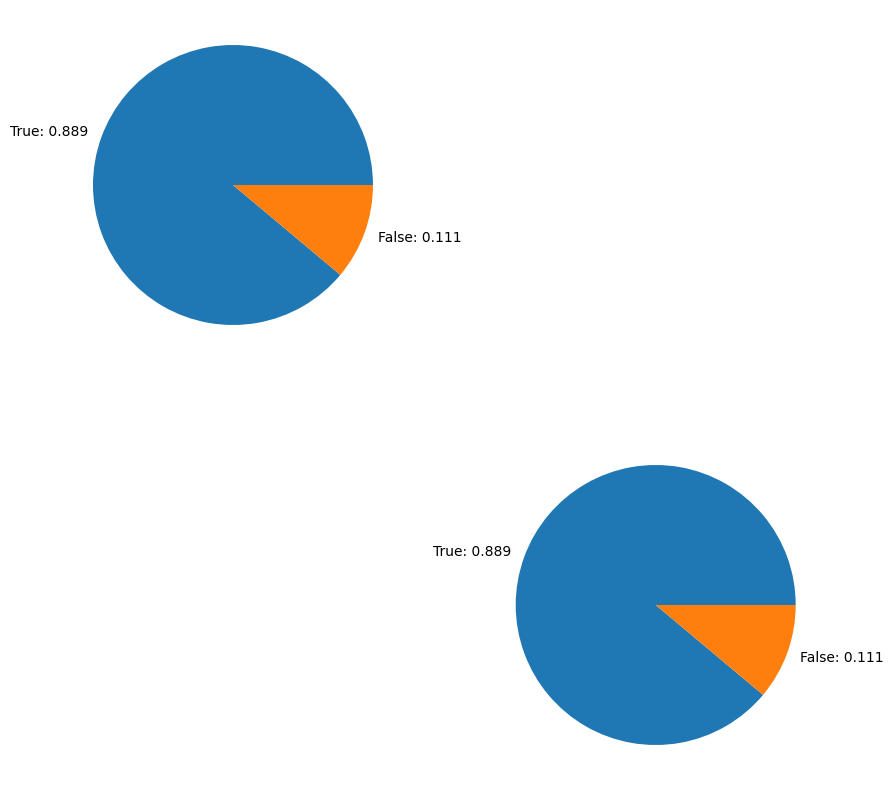

In [36]:
plt.figure(figsize=(10, 10)) # set figure size

plt.subplot(2, 2, 1)
LABELS = ['True' + ': ' + str(count_list[0]), 'False'+ ': ' + str(count_list[1])]
plt.pie(count_list, labels=LABELS)

plt.subplot(224) # plt.subplot(2, 2, 4) == plt.subplot(224)
LABELS = ['True' + ': ' + str(count_list[0]), 'False'+ ': ' + str(count_list[1])]
plt.pie(count_list, labels=LABELS)

2D Scatter Plot

Text(0, 0.5, 'latitude')

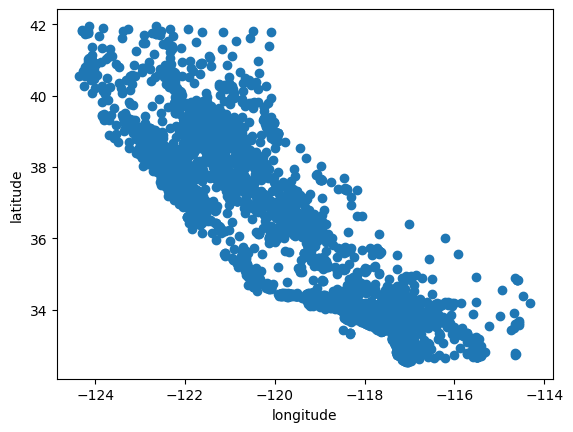

In [37]:
plt.scatter(df['longitude'], df['latitude'])
plt.xlabel('longitude')
plt.ylabel('latitude')

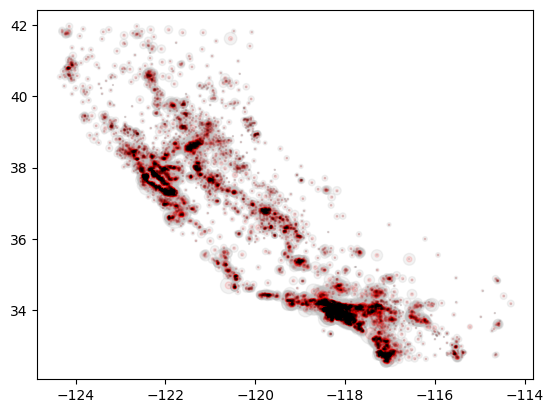

In [38]:
# Overlapping

plt.scatter(df['longitude'], df['latitude'], s=df['households']/20, color='silver', alpha=0.2) # Silver ring sized by households humber
plt.scatter(df['longitude'], df['latitude'], s=df['population']/500, color='red', alpha=0.1) # Red ring sized by population
plt.scatter(df['longitude'], df['latitude'], s=1, marker='+', color='black', alpha=0.1) # Data point in black

Scatter Plot with Histograms

In [39]:
def scatter_hist(x, y, ax, ax_histx, ax_histy):

    # labels
    ax_histx.tick_params(axis="x", labelbottom=True)
    ax_histy.tick_params(axis="y", labelleft=True)

    # the scatter plot:
    ax.scatter(df['longitude'], df['latitude'], s=df['households']/10, color='silver', alpha=0.2)
    ax.scatter(df['longitude'], df['latitude'], s=df['population']/250, color='red', alpha=0.1)
    ax.scatter(df['longitude'], df['latitude'], s=2, marker='+', color='black', alpha=0.1)

    # now determine nice limits by hand:
    binwidth = 0.1
    xymax = max(np.max(np.abs(df['longitude'])), np.max(np.abs(df['latitude']))) # take the greater one (absolute value) between x and y
    #print(xymax)
    lim = (int(xymax/binwidth) + 1) * binwidth # room for all the bins
    #print(lim)

    ax.set_xlim(min(df['longitude']), max(df['longitude']))
    ax.set_ylim(min(df['latitude']), max(df['latitude']))

    bins = np.arange(-lim, lim + binwidth, binwidth)
    print(bins)
    ax_histx.hist(df['longitude'], color='red', alpha=0.7, bins=bins, orientation='vertical')
    ax_histy.hist(df['latitude'], color='gray', bins=bins, orientation='horizontal')

[-124.4 -124.3 -124.2 ...  124.2  124.3  124.4]


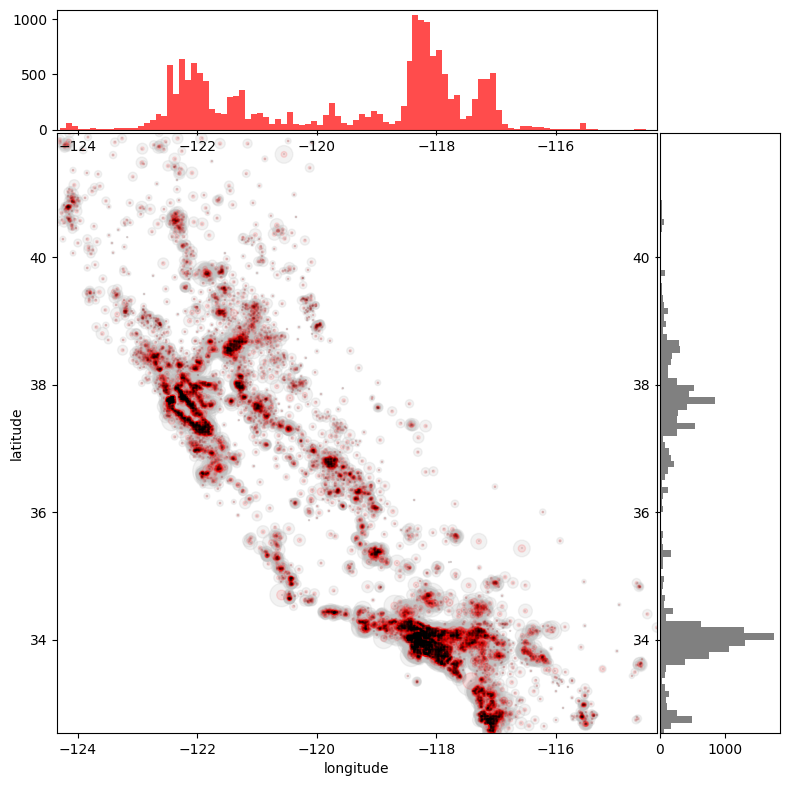

In [40]:
# definitions for the axes
left, width = 0.1, 1 # left margin, width of scatter plot
bottom, height = 0.1, 1 # bottom margin, height of scatter plot
spacing = 0.005 # gap between subplots

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a square Figure
fig = plt.figure(figsize=(6, 6))

ax = fig.add_axes(rect_scatter)
plt.xlabel('longitude')
plt.ylabel('latitude')

ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

# use the previously defined function
scatter_hist(df['longitude'], df['latitude'], ax, ax_histx, ax_histy)

plt.show()

[-124.4 -124.3 -124.2 ...  124.2  124.3  124.4]


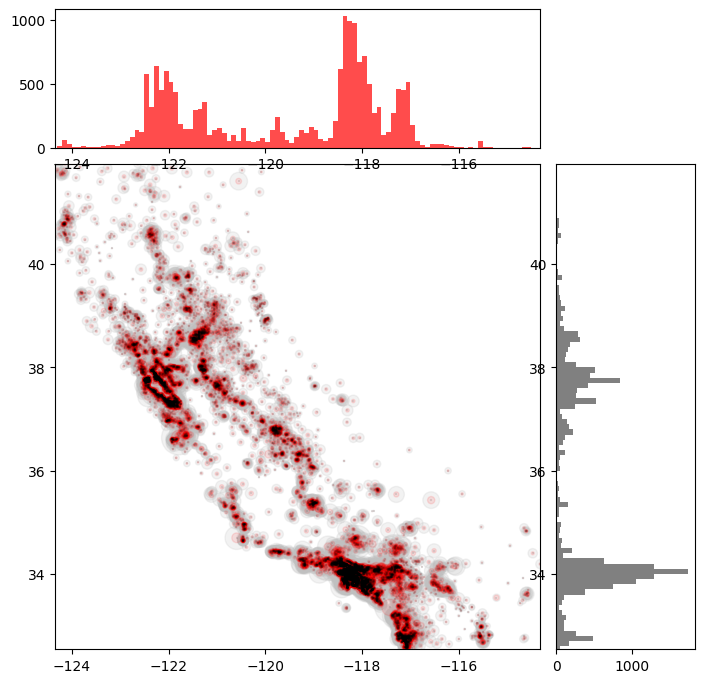

In [41]:
# start with a square Figure
fig = plt.figure(figsize=(8, 8))

# Add a gridspec with two rows and two columns and a ratio of 2 to 7 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(7, 2), height_ratios=(2, 7),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)

# use the previously defined function
scatter_hist(df['longitude'], df['latitude'], ax, ax_histx, ax_histy)

plt.show()

## Visualise Data Distribution: Kernel Density Estimation (KDE)

In [42]:
import seaborn as sns

In [90]:
# sns.kdeplot(df['population'], x='population')

#### check what caused 'the tail'.

In [46]:
df.sort_values(by=['population'], ascending=False)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
2274,-117.42,33.35,14,25135,4819,35682,4769,2.5729,134400
12772,-121.79,36.64,11,32627,6445,28566,6082,2.3087,118800
2871,-117.74,33.89,4,37937,5471,16122,5189,7.4947,366300
2969,-117.78,34.03,8,32054,5290,15507,5050,6.0191,253900
3296,-117.87,34.04,7,27700,4179,15037,4072,6.6288,339700
...,...,...,...,...,...,...,...,...,...
288,-116.76,34.14,4,42,10,9,3,0.5360,42500
14105,-122.06,37.39,26,18,4,8,4,3.7500,375000
2907,-117.76,35.22,4,18,3,8,6,1.6250,275000
2990,-117.79,35.21,4,2,2,6,2,2.3750,137500


In [47]:
df['population'] > 35000

0        False
1        False
2        False
3        False
4        False
         ...  
16995    False
16996    False
16997    False
16998    False
16999    False
Name: population, Length: 17000, dtype: bool

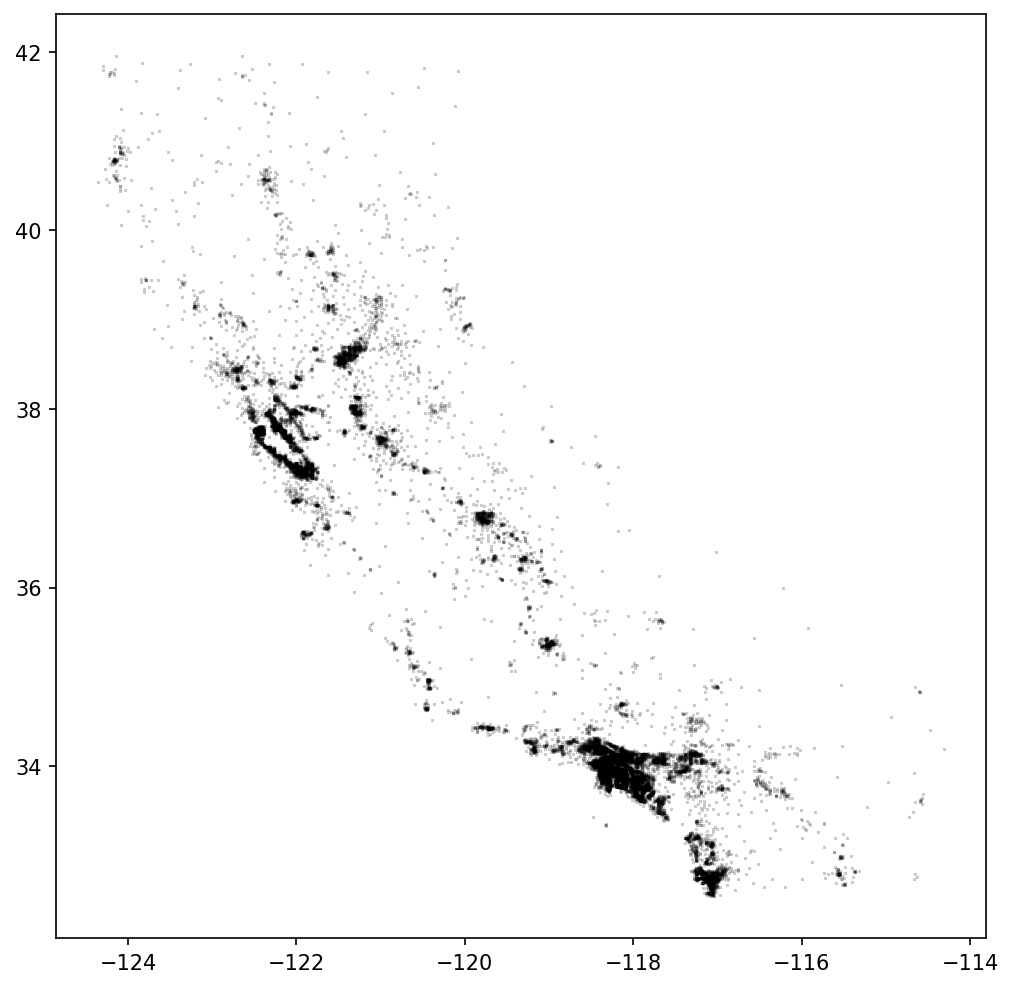

In [89]:
fig, ax = plt.subplots(1, figsize=(8,8), dpi=150)

#sns.kdeplot(df['longitude'], df['latitude'], cmap='plasma', shade=True, shade_lowest=True)

plt.scatter(df['longitude'], df['latitude'], s=2, marker='+', color='black', alpha=0.2)

3D Scatter plot

Text(0.5, 0, 'population')

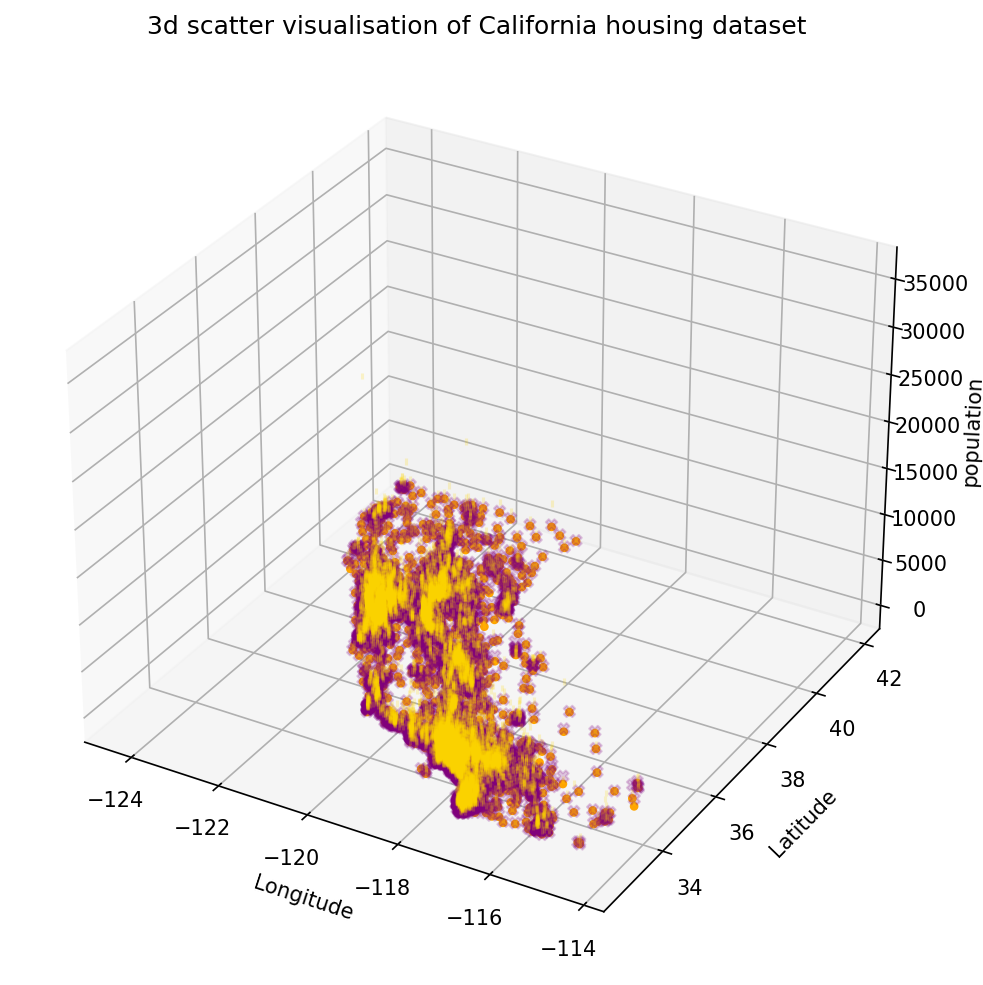

In [49]:
fig = plt.figure(figsize=(8, 8), dpi=150)

ax = fig.add_subplot(projection='3d')
plt.title('3d scatter visualisation of California housing dataset')

ax.scatter(df['longitude'], df['latitude'], df['households'], s=10, c='orange', alpha=1)
ax.scatter(df['longitude'], df['latitude'], df['total_bedrooms'], marker='X', s=30, c='purple', alpha=0.2)
ax.scatter(df['longitude'], df['latitude'], df['population'], marker='|', s=10, c='gold', alpha=0.2)

# plot axis labels
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('population')

Custom hillshading in a 3D surface plot

eference: https://matplotlib.org/stable/gallery/mplot3d/custom_shaded_3d_surface.html#sphx-glr-gallery-mplot3d-custom-shaded-3d-surface-py

Correlation Matrix

use `pandas.Dataframe.corr()` to create the correlation matrix across the quantatative parameters.

Reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

https://colab.research.google.com/drive/1f-7aUG590VcrO8Swb7Ejb0ZBgZCJfChZ#scrollTo=2oLO7OBds-2q


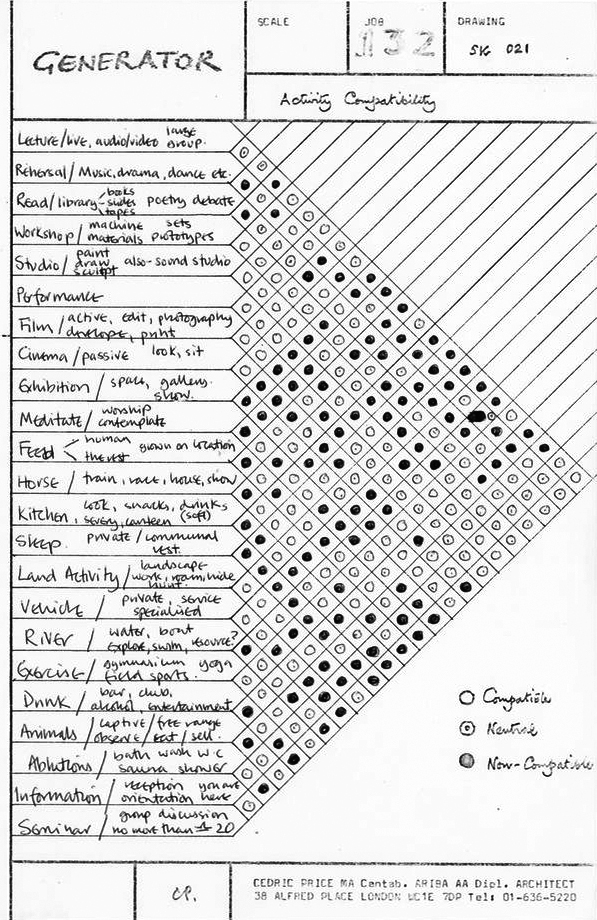

Cedric Price, The Generator Project (1976-79)

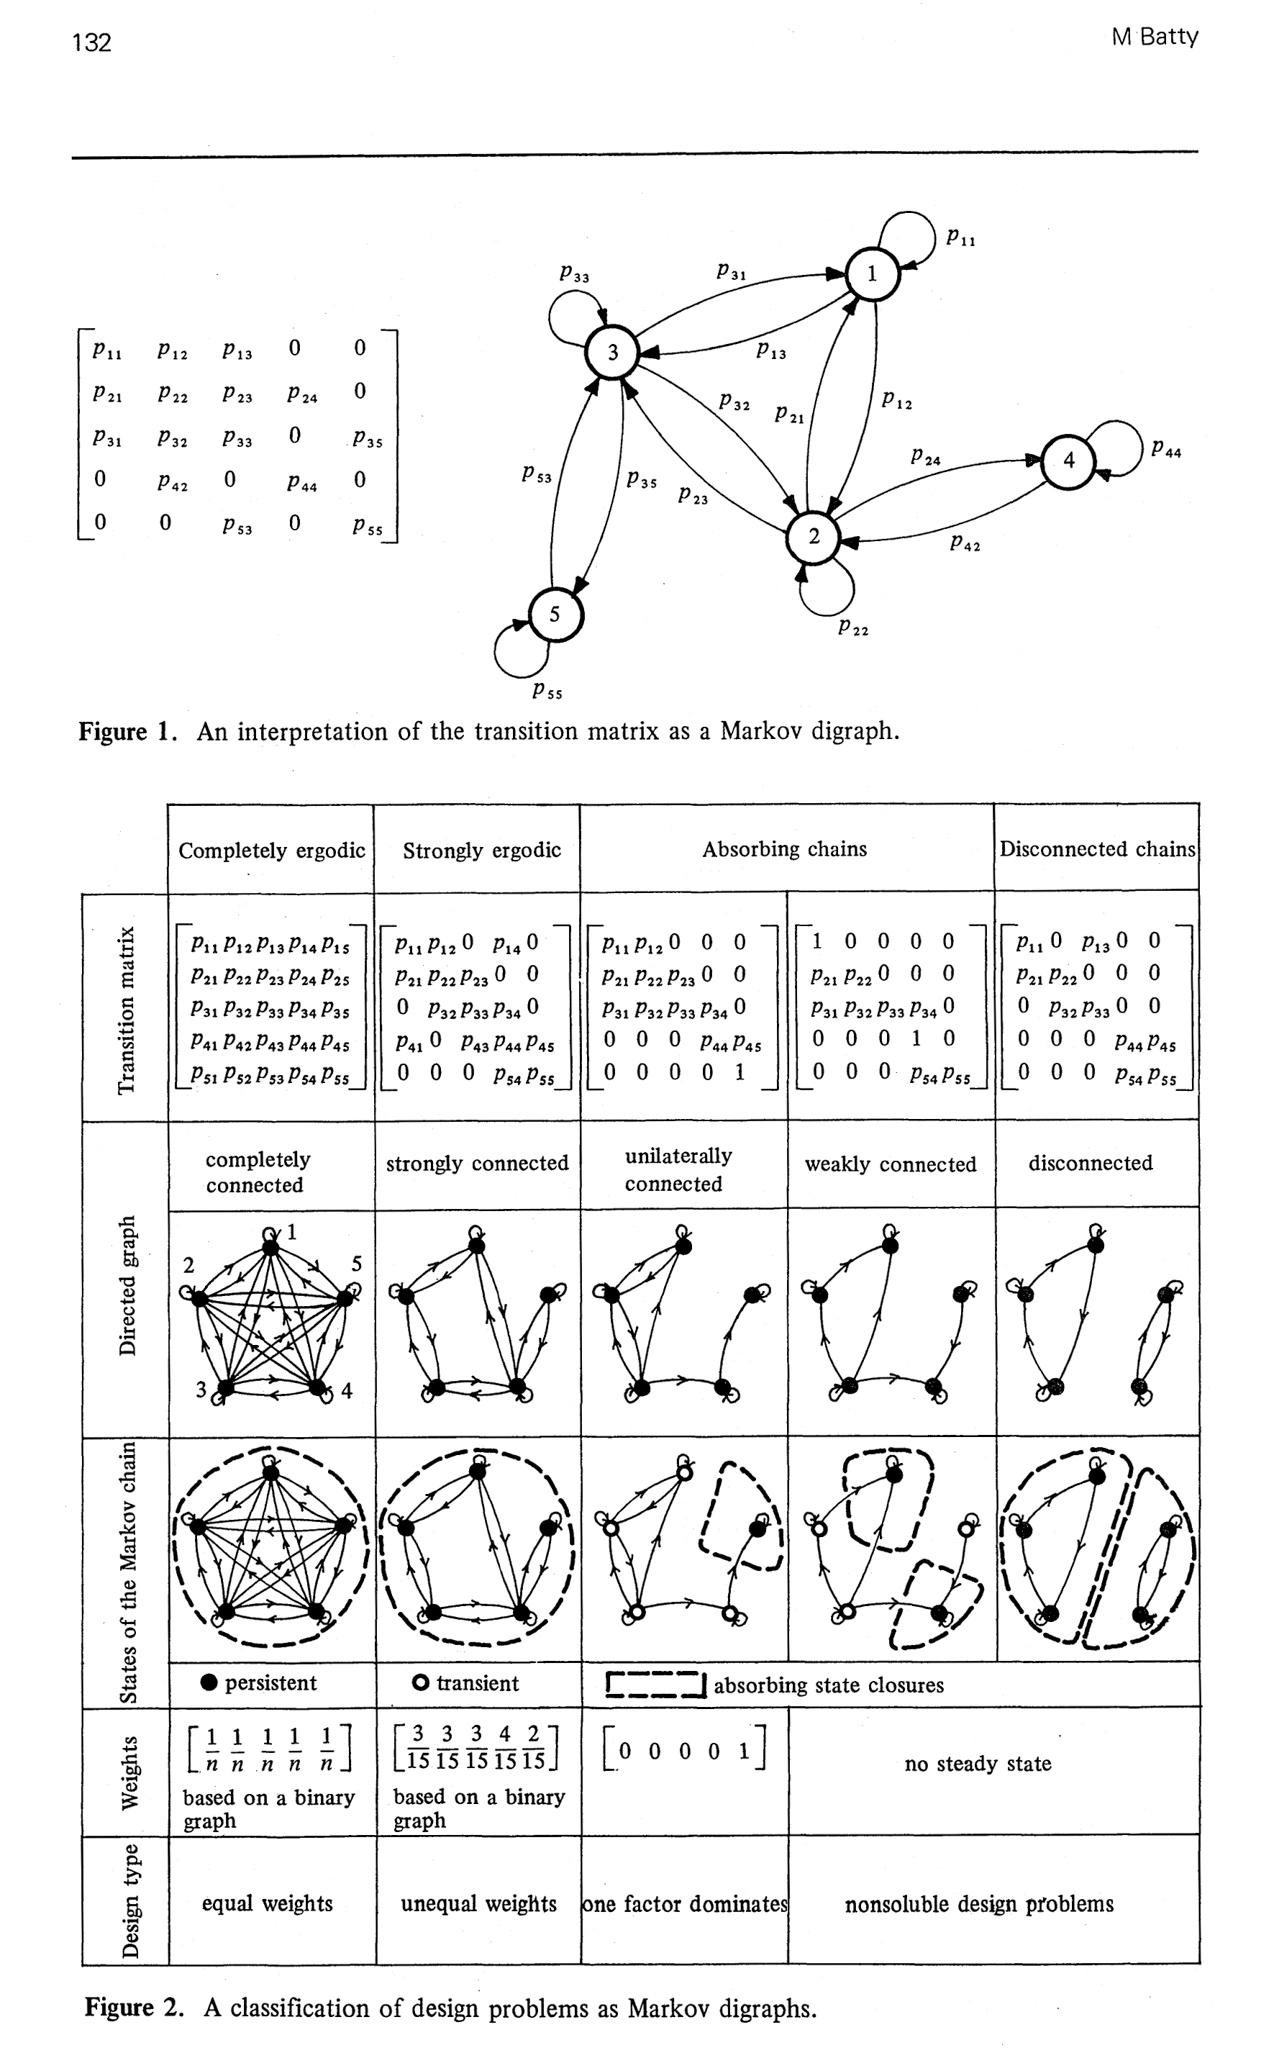

Source: Batty, M. 1974. A Theory of Markovian Design Machines. Environment and Planning B: Planning and Design, 1, 125-146.

In [50]:
df2.corr() # Only the columns with numeric data remain

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,big_house
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.044982,0.017812
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,-0.144917,-0.027177
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758,-0.109631
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991,0.327929
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783,0.328061
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850,0.298212
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031,0.332892
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871,0.115169
median_house_value,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000,0.100660
big_house,0.017812,-0.027177,-0.109631,0.327929,0.328061,0.298212,0.332892,0.115169,0.100660,1.000000


"\nLegend Location: \n'best'\t0\n'upper right'\t1\n'upper left'\t2\n'lower left'\t3\n'lower right'\t4\n'right'\t5\n'center left'\t6\n'center right'\t7\n'lower center'\t8\n'upper center'\t9\n'center'\t10\n"

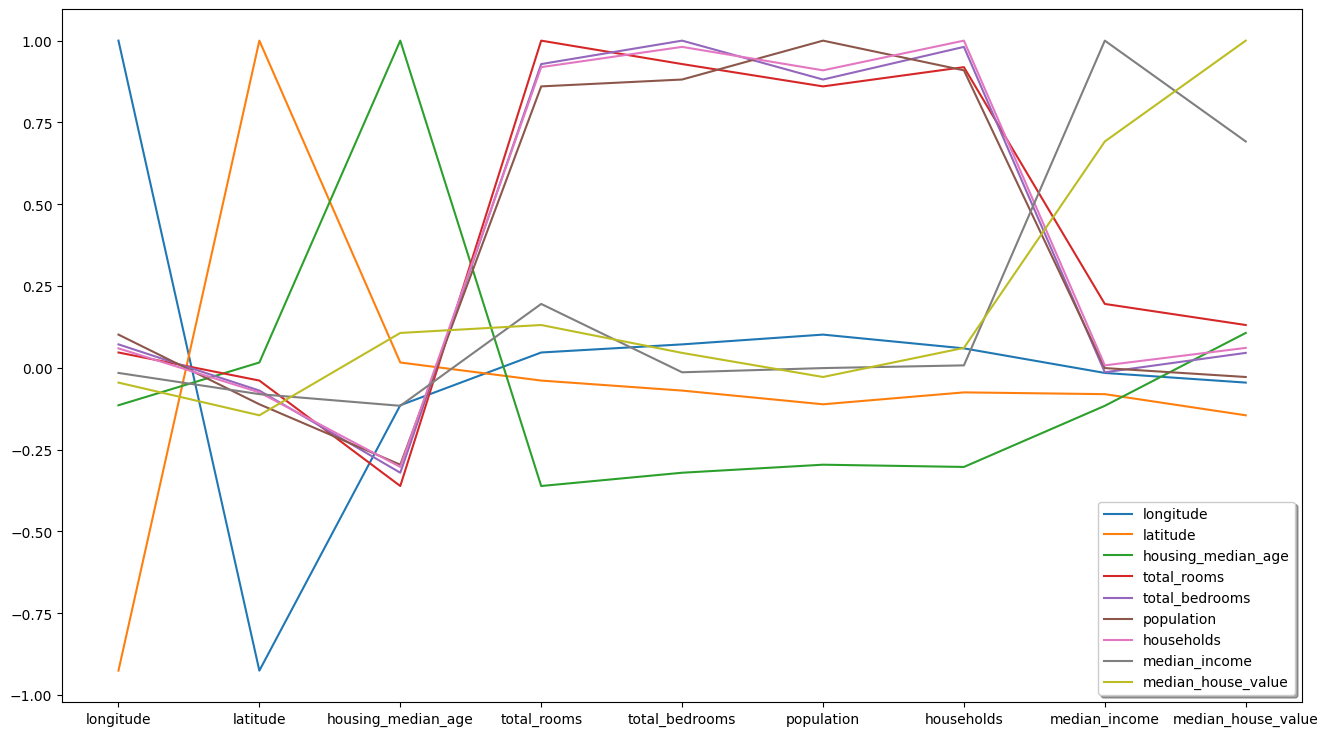

In [52]:
plt.figure(figsize=(16,9)) # set figure size
plt.plot(df.corr())
plt.legend(df.head(0), loc='lower right', shadow=True)


"""
Legend Location:
'best'	0
'upper right'	1
'upper left'	2
'lower left'	3
'lower right'	4
'right'	5
'center left'	6
'center right'	7
'lower center'	8
'upper center'	9
'center'	10
"""

<Axes: >

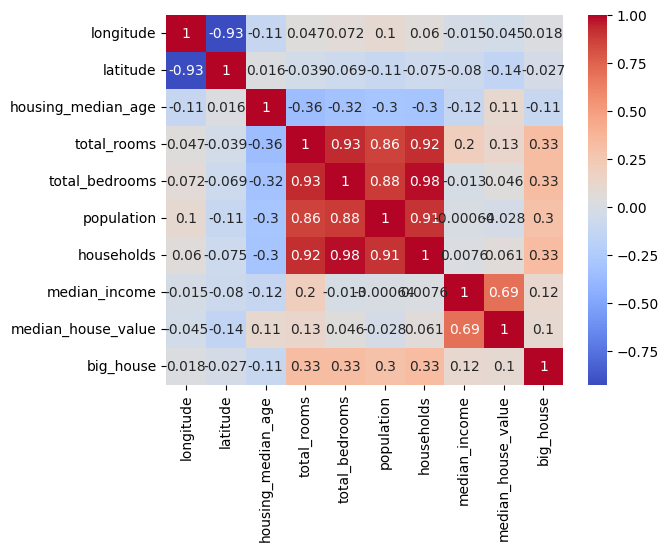

In [53]:
import seaborn as sns # Seaborn is a package for data visualisation

sns.heatmap(df2.corr(), cmap='coolwarm', annot=True)

In [54]:
df2

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,big_house
0,-114.31,34.19,15,5612,1283,1015,472,1.4936,66900,True
1,-114.47,34.40,19,7650,1901,1129,463,1.8200,80100,True
2,-114.56,33.69,17,720,174,333,117,1.6509,85700,False
3,-114.57,33.64,14,1501,337,515,226,3.1917,73400,True
4,-114.57,33.57,20,1454,326,624,262,1.9250,65500,True
...,...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52,2217,394,907,369,2.3571,111400,True
16996,-124.27,40.69,36,2349,528,1194,465,2.5179,79000,True
16997,-124.30,41.84,17,2677,531,1244,456,3.0313,103600,True
16998,-124.30,41.80,19,2672,552,1298,478,1.9797,85800,True


## Access Data

In [55]:
cities = pd.DataFrame({ 'City name': city_names, 'Population': population })
cities

,City name,Population
0,Oxford,152450
1,Cambridge,678600
2,London,8982000


How do I access data in a *column*?

`DataFrame[column_name]`

In [56]:
cities['City name']


0       Oxford
1    Cambridge
2       London
Name: City name, dtype: object

In [57]:
cities['City name'][1] # Access one specific cell in a column
print(type(cities['City name'][1]))

<class 'str'>


How do I access data in a *row*?

Option 1: `DataFrame[start:end]`


In [58]:
print(type(cities[0:2]))
cities[0:2]

<class 'pandas.core.frame.DataFrame'>


,City name,Population
0,Oxford,152450
1,Cambridge,678600


Option 2: `DataFrame.loc[num_of_row]`

In [59]:
cities.loc[0]
# type(cities.loc[0])

City name     Oxford
Population    152450
Name: 0, dtype: object

Conditional Selections

In [60]:
population[population < 1000000] # Boolean indexing

0    152450
1    678600
dtype: int64

In [61]:
cities['City name'].apply(lambda name: name.startswith('S'))

0    False
1    False
2    False
Name: City name, dtype: bool

In [62]:
cities['City name'].apply(lambda name: name.endswith('o'))

0    False
1    False
2    False
Name: City name, dtype: bool

## Indexes
Both `Series` and `DataFrame` objects also define an `index` property that assigns an identifier value to each `Series` item or `DataFrame` row.

By default, at construction, *pandas* assigns index values that reflect the ordering of the source data. Once created, the index values are stable; that is, they do not change when data is reordered.

In [63]:
city_names.index

RangeIndex(start=0, stop=3, step=1)

In [64]:
cities.index

RangeIndex(start=0, stop=3, step=1)

Call `DataFrame.reindex` to manually reorder the rows. For example, the following has the same effect as sorting by city name:

In [65]:
cities.reindex([2, 0, 1])

,City name,Population
2,London,8982000
0,Oxford,152450
1,Cambridge,678600


Reindexing is a great way to shuffle (randomize) a `DataFrame`. In the example below, we take the index, which is array-like, and pass it to NumPy's `random.permutation` function, which shuffles its values in place. Calling `reindex` with this shuffled array causes the `DataFrame` rows to be shuffled in the same way.
Try running the following cell multiple times!

In [66]:
import numpy as np
cities.reindex(np.random.permutation(cities.index))

,City name,Population
2,London,8982000
0,Oxford,152450
1,Cambridge,678600


For more information, see the [Index documentation](http://pandas.pydata.org/pandas-docs/stable/indexing.html#index-objects).

## Set Operation

In [67]:
asia = pd.Index(['china', 'japan', 'turkey'])

europe = pd.Index(['france', 'turkey', 'germany'])

asia.union(europe)

Index(['china', 'france', 'germany', 'japan', 'turkey'], dtype='object')

In [68]:
asia = pd.Index(['china', 'japan', 'turkey'])

europe = pd.Index(['france', 'turkey', 'germany'])

asia.difference(europe)

Index(['china', 'japan'], dtype='object')

In [69]:
asia.union(europe).difference(asia.difference(europe))

Index(['france', 'germany', 'turkey'], dtype='object')

## Save CSV

Option 1: Download as a CSV file

In [70]:
from google.colab import files

df2.to_csv('output.csv', encoding = 'utf-8-sig')
files.download('output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Option 2: Save as a CSV file to Google Drive

In [71]:
from google.colab import drive

path = '/content/drive/My Drive/outpur.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  df2.to_csv(f)

## Manipulate Data

You may apply Python's basic arithmetic operations to `Series`. For example:

In [72]:
population

0     152450
1     678600
2    8982000
dtype: int64

In [73]:
# Manipulating whole column
population / 1000

0     152.45
1     678.60
2    8982.00
dtype: float64

In [74]:
# Value summantion of columns
population + population

0      304900
1     1357200
2    17964000
dtype: int64

In [75]:
# Multiplication across columns
population * population

0       23241002500
1      460497960000
2    80676324000000
dtype: int64

In [76]:
print(cities['Population'][0])
print(cities['Population'][1])

cities['Population'][0] * cities['Population'][1]

152450
678600


103452570000

*Pandas* `Series` can be used as arguments to most [NumPy](http://www.numpy.org/) functions:

In [77]:
import numpy as np

np.log2(population)

0    17.217977
1    19.372202
2    23.098605
dtype: float64

For more complex single-column transformations, you can use `Series.apply`. Like the Python [map function](https://docs.python.org/2/library/functions.html#map),
`Series.apply` accepts as an argument a [lambda function](https://docs.python.org/2/tutorial/controlflow.html#lambda-expressions), which is applied to each value.

The example below creates a new `Series` that indicates whether `population` is over one million:

In [78]:
population.apply(lambda val: val > 1000000)

0    False
1    False
2     True
dtype: bool


Modifying `DataFrames` is also straightforward. For example, the following code adds two `Series` to an existing `DataFrame`:

In [79]:
cities['Area square miles'] = pd.Series([46.87, 176.53, 97.92])
cities['Population density'] = cities['Population'] / cities['Area square miles']
cities

,City name,Population,Area square miles,Population density
0,Oxford,152450,46.87,3252.613612
1,Cambridge,678600,176.53,3844.105818
2,London,8982000,97.92,91727.941176


## Conditional Selection

In [80]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15,5612,1283,1015,472,1.4936,66900
1,-114.47,34.40,19,7650,1901,1129,463,1.8200,80100
2,-114.56,33.69,17,720,174,333,117,1.6509,85700
3,-114.57,33.64,14,1501,337,515,226,3.1917,73400
4,-114.57,33.57,20,1454,326,624,262,1.9250,65500
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52,2217,394,907,369,2.3571,111400
16996,-124.27,40.69,36,2349,528,1194,465,2.5179,79000
16997,-124.30,41.84,17,2677,531,1244,456,3.0313,103600
16998,-124.30,41.80,19,2672,552,1298,478,1.9797,85800


In [81]:
df[df.population > 30000]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
2274,-117.42,33.35,14,25135,4819,35682,4769,2.5729,134400


In [82]:
df[df.population > 10000]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
1116,-117.12,33.52,4,30401,4957,13251,4339,4.5841,212300
2274,-117.42,33.35,14,25135,4819,35682,4769,2.5729,134400
2464,-117.61,34.10,9,18956,4095,10323,3832,3.6033,132600
2871,-117.74,33.89,4,37937,5471,16122,5189,7.4947,366300
2897,-117.75,34.01,4,22128,3522,10450,3258,6.1287,289600
2969,-117.78,34.03,8,32054,5290,15507,5050,6.0191,253900
3296,-117.87,34.04,7,27700,4179,15037,4072,6.6288,339700
3359,-117.88,33.96,16,19059,3079,10988,3061,5.5469,265200
4771,-118.09,34.68,4,23386,4171,10493,3671,4.0211,144000
4856,-118.10,34.57,7,20377,4335,11973,3933,3.3086,138100


In [83]:
df.loc[df.population > 10000, 'population'].max()

35682

In [84]:
df.loc[df.population > 10000, 'population'].min()

10323

In [85]:
df_temp = df.population > 10000

list(df.index[df_temp])

[1116,
 2274,
 2464,
 2871,
 2897,
 2969,
 3296,
 3359,
 4771,
 4856,
 8319,
 8881,
 8959,
 10692,
 12018,
 12475,
 12586,
 12772,
 13299]

## Sort Data

In [86]:
df.sort_values(by=['housing_median_age'])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
13708,-122.00,38.23,1,2062,343,872,268,5.2636,191300
10993,-120.93,37.65,1,2254,328,402,112,4.2500,189200
1353,-117.17,34.12,2,3867,573,1275,433,5.4138,164400
8765,-118.61,34.38,2,5989,883,1787,613,6.6916,329500
8672,-118.56,34.42,2,966,270,233,169,1.9667,450000
...,...,...,...,...,...,...,...,...,...
15193,-122.27,37.89,52,2640,366,973,355,7.2660,371100
15192,-122.27,37.89,52,3046,373,975,365,8.8342,430500
15190,-122.27,37.90,52,1803,240,572,236,6.1740,358800
15209,-122.27,37.85,52,1974,426,875,363,1.5817,153600


In [87]:
df.sort_values(by=['housing_median_age'], ascending=False)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
16999,-124.35,40.54,52,1820,300,806,270,3.0147,94600
14561,-122.16,38.05,52,1888,457,830,408,3.1373,185100
6551,-118.28,34.18,52,2602,418,1137,419,5.3185,358000
4420,-118.03,33.99,52,2792,461,1177,439,3.4312,243800
14579,-122.16,37.74,52,771,147,355,144,4.1458,143400
...,...,...,...,...,...,...,...,...,...
1880,-117.28,34.06,2,1658,290,868,304,5.1365,136700
4274,-118.01,34.55,2,2701,530,1368,430,4.0710,137400
2771,-117.70,33.51,2,5261,763,1460,599,6.8279,279000
10993,-120.93,37.65,1,2254,328,402,112,4.2500,189200


In [88]:
df.sort_values(by=['housing_median_age', 'households']) # order stands for sorting priority

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
10993,-120.93,37.65,1,2254,328,402,112,4.2500,189200
13708,-122.00,38.23,1,2062,343,872,268,5.2636,191300
113,-115.80,33.26,2,96,18,30,16,5.3374,47500
1834,-117.27,33.93,2,337,55,115,49,3.1042,164800
13345,-121.93,37.78,2,227,35,114,49,3.1591,434700
...,...,...,...,...,...,...,...,...,...
7384,-118.35,34.06,52,3446,1360,1768,1245,2.4722,500001
15761,-122.41,37.80,52,3260,1535,3260,1457,0.9000,500001
6274,-118.25,34.05,52,2806,1944,2232,1605,0.6775,350000
15772,-122.41,37.79,52,6016,2509,3436,2119,2.5166,275000
